2.2.    Ajuste de Contraste
                        
                    
Los procesos de realice de imágenes consisten de una serie de técnicas cuyo objetivo es mejorar la apariencia visual de una imagen, ya sea en contraste, ruido, escala de grises, distorsiones, luminosidad, falta de nitidez, etc., o bien con vertir o mapear la imagen a una mejor forma para su análisis. El principal objetivo del realce de la imagen es procesar una imagen de tal manera que el resultado obtenido sea el apropiado para una aplicación específica. Los métodos de realce de imágenes los podemos dividir en dos categorías: los métodos de realce en el dominio espacial y los métodos de realce en el dominio de la frecuencia Los métodos de la primera categoría consisten en la manipulación directa de los pixeles de la imagen mientras que los métodos de la segunda categoría corresponden a técnicas basadas en la representación de los pixeles, a través de una transformación hacía el dominio frecuencial y usa como operador de mapeo o transformación a la DFT. Dentro de los métodos de realce espacial podemos encontrar dos técnicas:
                    
El realce radiométrico donde las operaciones son efectuadas directamente sobre un pixel sin importar o tomar en cuenta a los pixeles vecinos. Sirve para mejorar condiciones de bajo contraste, baja luminosidad o demasiada oscuridad. Ejemplo: ecualización de histograma.

El realce con operaciones entre vecinos que, a diferencia del realce radiométrico, las opera- ciones son efectuadas sobre un pixel pero tomando en cuenta a los pixeles que lo rodean.            

Sirve para eliminar ruido o para el mejoramiento de la nitidez. Ejemplo: kernel correspon- diente a un filtro paso-bajas usando la convolución para realizar un filtrado espacial

Para la realización de las prácticas se deben seleccionar imagenes que estén bajas en exposición de luz y sobre expuestas para poder utlizar a plenitud el ajuste de las mismas
                    
Para realizar el ajuste del contraste de una imagen esto se logra por medio de una expansión del rango dinámico de los valores de intensidad de una imagen. Para lograrlo debemos hacer lo siguiente:



Ejercicio 1: Responder
    ¿Cómo es posible especificar los valores máximos y mínimos a los cuales la imagen debe ser normalizada.?     
    Por lo general estos límites en una imagen que utiliza la representación de 8bits para un nivel de gris tendrá [0, 255]
                        
                            
el método más simple consiste en encontrar el valor más pequeño de los pixeles en la imagen y el más alto. Llamémoslos c y d, entonces cada pixel P es escalado usando la siguiente función
                            

                        
                            
se adopta que valores negativos se ponene a cero y valoires cercanos a 255 se ponen a 255.


El valor minimo de la imagen es 7.369
El valor maximo de la imagen es 255.0


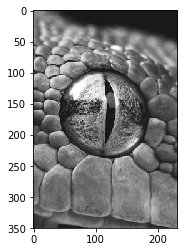

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('Imagenes_Pruebas/prueba1.jpg')   

gray = rgb2gray(img)   



img = cv2.imread('Imagenes_Pruebas/prueba1.jpg',0)
height, width = img.shape[:2]
resp=1000
for i in range(height):
    minu=min(gray[i,:])
    if(resp>minu):
        resp=minu
        
maxs=0
for i in range(height):
    minm=max(gray[i,:])
    if(maxs<minm):
        maxs=minm

a=resp
b=maxs
print ("El valor minimo de la imagen es",resp)
print ("El valor maximo de la imagen es",maxs)

#Utilizar la expresión anterior
gray= (gray-a)*(255/(b-a));

plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()